### Library loading

In [1]:
import os

# for handling dataframe
import re
import csv
import pandas as pd
import numpy as np

# for BOW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# for wordcloud
import matplotlib.pylab as plt
from wordcloud import WordCloud
from PIL import Image

# working directory setting
work_dir = 'D:/Document/project/HYStudy/scripts'
os.chdir(work_dir)

### Data loading

In [2]:
raw_text = pd.read_csv('[HYStudy 17th] ex_data.csv', encoding='utf-8', names=['content'])
raw_text.head()

,content
0,대리점 폰 사려 꼭알아가야할점 그런것들있나 제 지금 gpro2 쓰 넘 약정 끝나 그...
1,위약4 질문 g5 제 ㅎㅇ 개통 599유 조건 그 유지 끝내 나 폰 바꾸 되 저 청...
2,가격대 중고가20만원 포함 추천 이어폰 어느정도 후보군 추려 er4 ue900 트파...
3,잠깐 기기 위약금 나오 제 g5 새기 생기 통신사 skt 유심 하려 보 g5새 lg...
4,g5 진열 되 상태 폰 못쓸거같은데 예 도색 벗기 요


### Make Corpus

In [3]:
corpus = np.array(raw_text['content'])
print(len(corpus))
print(corpus[0:3])

raw_text.tail()

8349
[ '대리점 폰 사려 꼭알아가야할점 그런것들있나 제 지금 gpro2 쓰 넘 약정 끝나 그 폰 발열 하구 베터리 따르 엇보 와이파이 접촉 불량때문 와이파이 켜 않 이참 폰 바꾸 하 노트5 g5 생각 g5 평이 너무 안좋더 노트5생 요즘 노트5 대리점 구입 얼마인가 kt쓰고있 기기 하 생각 폰 법 바뀌 나 구매 알아야할점 그런것들있나 네이버 치 노트5 정도 하 것 맞 요즘 69했을경우 음 제 대충 보기 요금 따르 공시 바뀌 요금 비싼요금제 시작 한달 쓰 바 바꾸 되 이런것들 추가적 있 대리점 요금 구매 혜택 있 블루스 그런곳 바꾸 정보 주세 사 당하 하 흑'
 '위약4 질문 g5 제 ㅎㅇ 개통 599유 조건 그 유지 끝내 나 폰 바꾸 되 저 청구 위약4 3 ㅎㅇ완납 4 금액 550 사용 제외 730 이 되 ㅎㅇ 개통 g5 사용 다시 번이했 경우 위 금액만큼 제 물 맞 문의 드립 다'
 '가격대 중고가20만원 포함 추천 이어폰 어느정도 후보군 추려 er4 ue900 트파 포낙 보스 h3 등 있 무선 제이버드 akg 브라 rox sbh80 정도 있나봐 추천 대브븐 유선 해주 무선 음악 리면 되는거 apt x 지원 sbh80 유닛 소리 어느정도 간음 안되 비교 분 계신 그리 g5 이번 나 리시버 o 연결 위 후보군 성능 다 올라가능건가 니 b o 성향 맞추 유닛 가리 쓰 분 계신 요']


,content
8344,카우붐 마지막 수령 레노 g50 amd 램6기 모델 비닐 다 안떼졌 베젤 극 기스 ...
8345,라온티앤아 타무즈 스톤 x 사용 싼 게이밍 마우스 다를봐 없 게이밍 라온티앤아 타무...
8346,만약 ㅎㅇ 핸드폰 구입 핸드폰 새 사 되 크 ㅂㅇ ㅎㅇ v10 을 구입 초 g5 나...
8347,cube t8 plus noroot 내장메모리 통합 순정 리커버리 sd 해제 cub...
8348,노트북 살 하 사야 하 모르 업무용 가지 녀 집 사용 게임 던파 가끔 하 현재 사용...


### Make BOW

In [4]:
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus = tf_vectorizer.fit(corpus)
tf_bow = tf_vectorizer.fit_transform(corpus)
tf_bow

<8349x3578 sparse matrix of type '<class 'numpy.int64'>'
	with 193856 stored elements in Compressed Sparse Row format>

In [5]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tfidf_corpus = tf_vectorizer.fit(corpus)
tfidf_bow = tfidf_vectorizer.fit_transform(corpus)
tfidf_bow

<8349x3578 sparse matrix of type '<class 'numpy.float64'>'
	with 193856 stored elements in Compressed Sparse Row format>

- TF vectorizer

In [6]:
# check vocabulary in TDM
print(len(tf_corpus.vocabulary_))
print(len(tf_corpus.get_feature_names()))
tf_vectorizer.get_feature_names()[1000:1010]

3578
3578


['대폭', '대하', '대학생', '대한민국', '대해', '대형', '대화면', '댓글', '더럽', '더불']

In [7]:
# frequency count
tf_word_sum = tf_bow.toarray().sum(axis=0)
tf_word_name = tf_corpus.get_feature_names()
tf_word_dict = {}

for i in range(len(tf_word_sum)):
    tf_word_dict[tf_word_name[i]] = tf_word_sum[i]
    
print(tf_corpus.get_feature_names()[150:160])
print(tf_word_sum[150:160])

['g5쪽', 'g5출시', 'g5카메', 'g5하', 'g5후', 'g6', 'g7', 'g7x', 'galaxy', 'gk']
[ 9 16 11  9  9 66 11 15 54 18]


In [8]:
# word & index number
tf_word_dict

{'기록': 27,
 '계약서': 18,
 '마시': 20,
 '그래픽카드': 45,
 '고민': 874,
 '괜찮다': 29,
 '나을': 82,
 '옮기': 106,
 '안타깝': 39,
 '선택지': 22,
 '광주': 17,
 '철회': 21,
 '문의': 180,
 '노트북': 146,
 '화이트': 82,
 '유플러스': 123,
 '일하': 19,
 '기본': 429,
 '구매자': 55,
 '하이마트': 171,
 '홍보': 38,
 'ㅌㅋㄴ': 25,
 '64gb': 27,
 'ls2d': 22,
 '경기': 13,
 '위치': 108,
 '고정이': 12,
 '먼지': 59,
 '메뉴': 42,
 '국내': 199,
 '편한': 37,
 '평소': 77,
 '싼맛': 10,
 '손가락': 50,
 '날씨': 52,
 '입체감': 10,
 '화웨이': 37,
 '붙이': 98,
 '효도': 10,
 '시계': 39,
 '방진': 14,
 '분리형': 16,
 '만나': 42,
 'a7': 73,
 '좋을거': 18,
 '클리앙': 11,
 '인터파크': 18,
 '찍기': 19,
 '답답': 84,
 '매달': 38,
 '무겁': 41,
 '퀵커버': 20,
 '전국': 10,
 '의향': 9,
 'mode': 152,
 '정리': 84,
 '국민': 18,
 '일주일': 95,
 '특별': 44,
 '묻히': 10,
 '웹서핑': 73,
 '튼튼': 27,
 '점이': 69,
 'dslr': 41,
 '가죽': 30,
 '대부분': 138,
 '높다': 14,
 '작업': 44,
 '예약': 143,
 '진심': 16,
 '사과': 27,
 '칩셋': 13,
 'cat6': 21,
 '택배': 151,
 '어둡': 119,
 '노트5': 245,
 '이번': 863,
 '웨이즈': 69,
 '저번': 34,
 '특성': 15,
 '지난번': 12,
 '파손': 32,
 '모듈빼': 9,
 '채우': 32,
 'kt': 460,
 '단말': 3

- TF-IDF vectorizer

In [9]:
# check vocabulary in TDM
print(len(tfidf_corpus.vocabulary_))
print(len(tfidf_corpus.get_feature_names()))
tfidf_vectorizer.get_feature_names()[1000:1010]

3578
3578


['대폭', '대하', '대학생', '대한민국', '대해', '대형', '대화면', '댓글', '더럽', '더불']

In [10]:
# frequency count
tfidf_word_sum = tfidf_bow.toarray().sum(axis=0)
tfidf_word_name = tfidf_corpus.get_feature_names()
tfidf_word_dict = {}

for i in range(len(tfidf_word_sum)):
    tfidf_word_dict[tfidf_word_name[i]] = tfidf_word_sum[i]
    
print(tfidf_corpus.get_feature_names()[150:160])
print(tfidf_word_sum[150:160])

['g5쪽', 'g5출시', 'g5카메', 'g5하', 'g5후', 'g6', 'g7', 'g7x', 'galaxy', 'gk']
[  1.9353321    4.90042073   3.53566612   2.89852336   2.48341187
  11.61954354   2.57126653   2.2969142    7.82942507   2.74237528]


In [11]:
# word & index number
tfidf_word_dict

{'기록': 3.059014735227978,
 '계약서': 4.0762238074865245,
 '마시': 2.9296344494642166,
 '그래픽카드': 7.4830303723052323,
 '고민': 102.47237899899717,
 '괜찮다': 4.5461563979857695,
 '나을': 15.346104063990092,
 '옮기': 17.092562774668181,
 '안타깝': 6.0284246014505154,
 '선택지': 4.8311254278910321,
 '광주': 5.056074283813941,
 '철회': 4.129889748313043,
 '문의': 24.092461171219675,
 '노트북': 17.100678766342558,
 '화이트': 10.765715374793414,
 '유플러스': 19.486255689020755,
 '일하': 4.0667203292007956,
 '기본': 46.679144353133104,
 '구매자': 9.6881068522525364,
 '하이마트': 26.667847797146177,
 '홍보': 7.1818885912708899,
 'ㅌㅋㄴ': 6.6258725718419837,
 '64gb': 4.2459870638483741,
 'ls2d': 6.6553979743928222,
 '경기': 3.1890090523074286,
 '위치': 11.445960340792681,
 '고정이': 2.1158070432499416,
 '먼지': 8.8844900155381872,
 '메뉴': 6.1647463294687954,
 '국내': 25.506655312012178,
 '편한': 5.2286975301955447,
 '평소': 10.478068323474037,
 '싼맛': 1.7639435792524509,
 '손가락': 6.2607914808829337,
 '날씨': 12.575086311364982,
 '입체감': 1.3689955551571156,
 '화웨이': 6

### File write by csv

In [12]:
with open('tf.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.writer(f, delimiter=',', lineterminator='\n')
    for key, value in tf_word_dict.items():
        w.writerow([key, value])

with open('tfidf.csv', 'w') as f:
    w = csv.writer(f, delimiter=',', lineterminator='\n')
    for key, value in tfidf_word_dict.items():
        w.writerow([key, value]) 

### Co-occurence Matrix

In [13]:
tf_cooccur = (tf_bow.T * tf_bow) # co-occurrence matrix in sparse csr format
tf_cooccur.setdiag(0) # fill same word cooccurence to 0
print(tf_cooccur.todense()) # print out matrix in dense format
tf_cooccur

[[0 3 0 ..., 0 0 0]
 [3 0 0 ..., 2 1 0]
 [0 0 0 ..., 0 0 1]
 ..., 
 [0 2 0 ..., 0 0 1]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]


<3578x3578 sparse matrix of type '<class 'numpy.int64'>'
	with 3661940 stored elements in Compressed Sparse Column format>

In [14]:
# create co-occurence matrix to pandas dataframe
tf_df = pd.DataFrame(data=tf_cooccur.todense(),
             index=tf_corpus.vocabulary_.keys(),
             columns=tf_corpus.vocabulary_.keys())
tf_df[0:10]

,ls2d,사과,기회,게다,장기적,사지,판매,파지,광탈,인해,...,들뜨,올라오,나머지,풍경,feat,예민,모듈식,분리,안받,하이엔드
ls2d,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
사과,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,0
기회,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
게다,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
장기적,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
사지,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
판매,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
파지,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
광탈,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
인해,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# co-occurence matrix to csv
tf_df.to_csv('tf_cooccur.csv', index=True, sep=';')

### WordCloud
- pip install wordcloud
- conda install -c https://conda.anaconda.org/amueller wordcloud


- GitHub Add.: https://github.com/amueller/word_cloud
- Doc: http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
- Mask image source: http://www.stencilry.org/stencils/

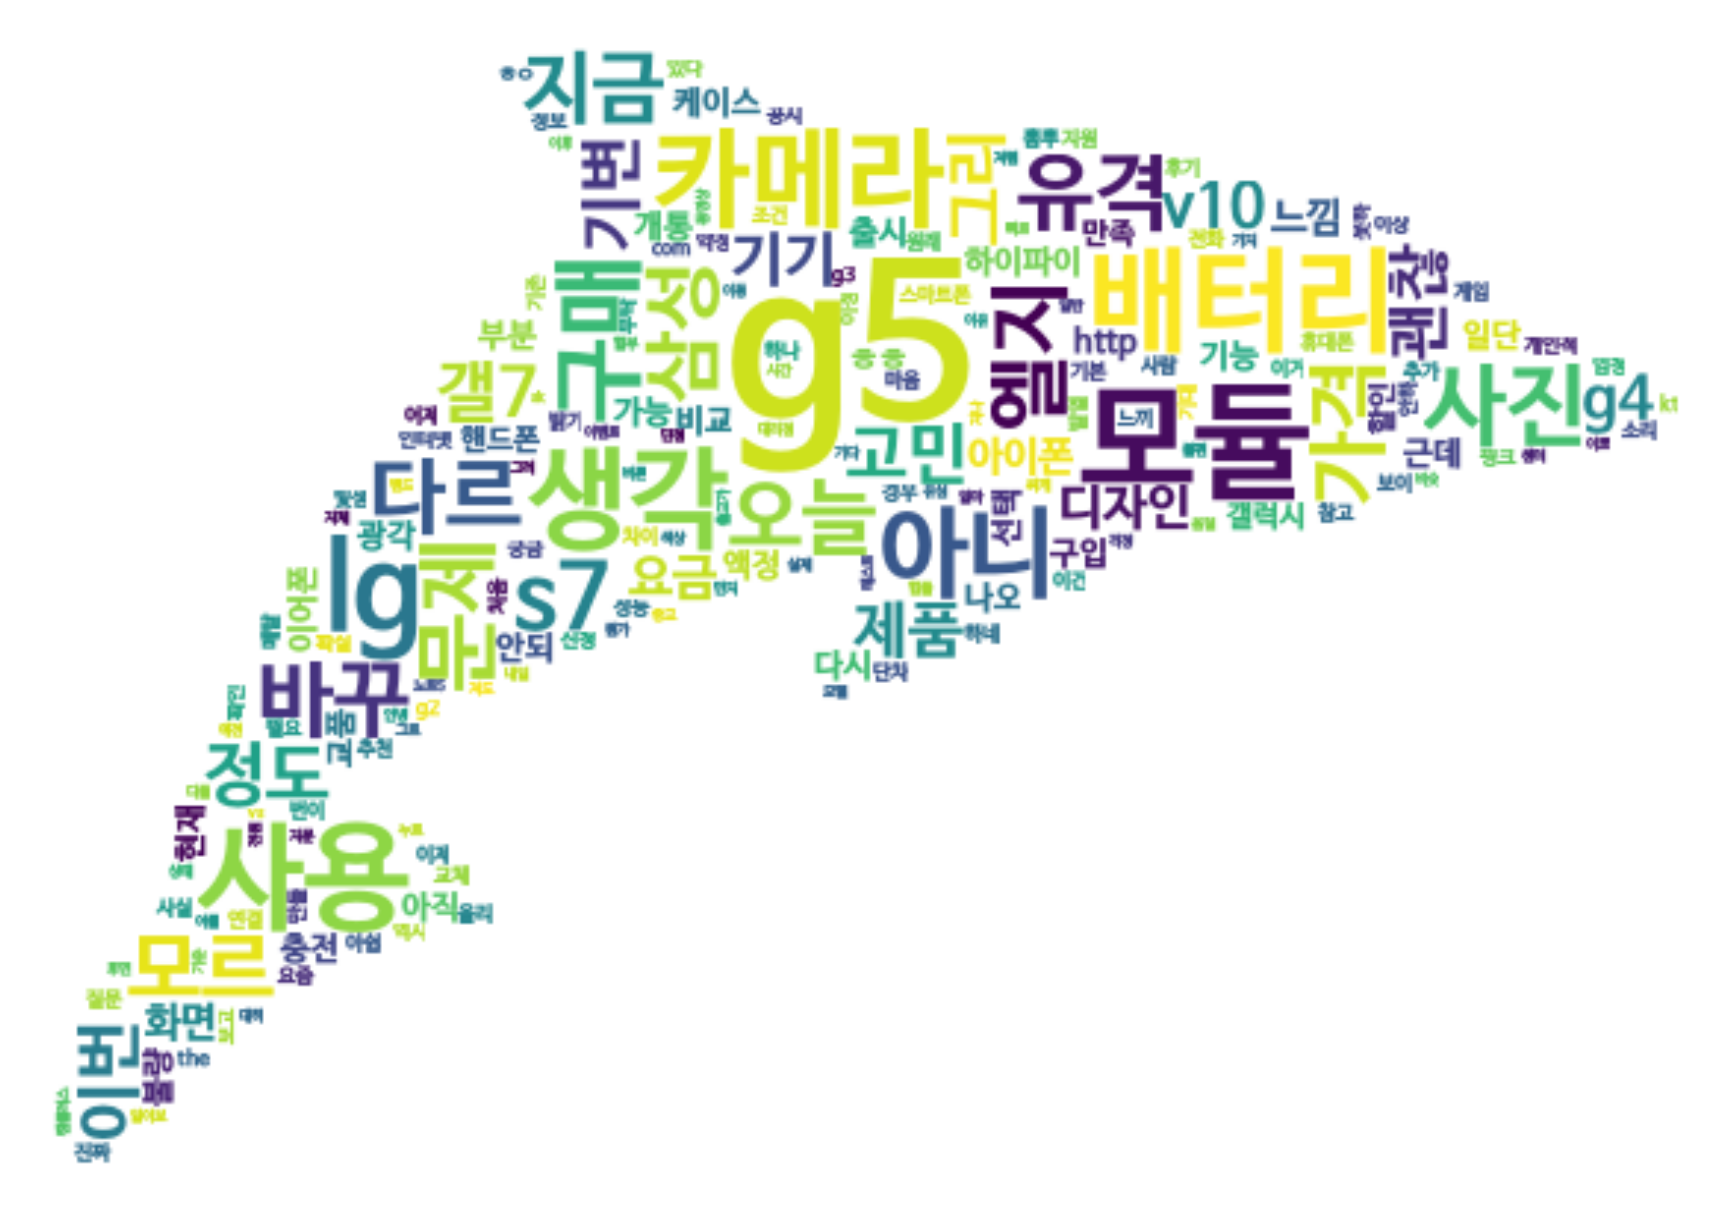

In [16]:
# use Korean font, set mask image
font_path = 'C:/Windows/Fonts/NanumBarunGothicBold.otf'
mask_image = np.array(Image.open('D:/Document/project/HYStudy/scripts/[HYStudy 17th] mask_image.jpg'))

# Generate a word cloud image and display
wordcloud = WordCloud(max_font_size=72,
                      font_path=font_path,
                      background_color='white',
                      mask=mask_image).generate_from_frequencies(tf_word_dict)

plt.figure(figsize=(30, 90))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()